In [2]:
import networkx as nx
import numpy as np
import scipy
import sys
from collections import deque, Counter

#Graph

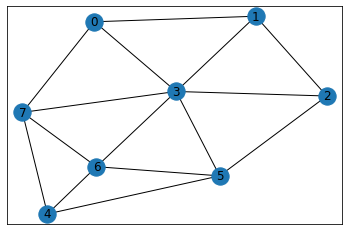

In [3]:
graph = nx.Graph()

nodes = [0,1,2,3,4,5,6,7]
edges=[
       (0,1), (0,3),
       (1,2), (1,3),
       (2,3),
       (3,5), (3,6),
       (4,7), (4,5),
       (5,2),
       (6,5), (6,7), (6,4),
       (7,3), (7,0)
       ]

graph.add_nodes_from(nodes)
graph.add_edges_from(edges)


nx.draw_networkx(graph)

In [4]:
#Get adjacency matrix
adj_matrix = nx.adjacency_matrix(graph)
adj_matrix = adj_matrix.todense()
print(adj_matrix)

[[0 1 0 1 0 0 0 1]
 [1 0 1 1 0 0 0 0]
 [0 1 0 1 0 1 0 0]
 [1 1 1 0 0 1 1 1]
 [0 0 0 0 0 1 1 1]
 [0 0 1 1 1 0 1 0]
 [0 0 0 1 1 1 0 1]
 [1 0 0 1 1 0 1 0]]


In [5]:
graph.edges()

EdgeView([(0, 1), (0, 3), (0, 7), (1, 2), (1, 3), (2, 3), (2, 5), (3, 5), (3, 6), (3, 7), (4, 7), (4, 5), (4, 6), (5, 6), (6, 7)])

#DFS

In [6]:
def DFS (graph, start, visited):
  if (start not in visited):

    visited.append(start)
    print(start, sep=' ')

    for adjacent in list(graph.adj[start]):

      DFS(graph, adjacent, visited)
    
DFS(graph, 3, [])

3
0
1
2
5
4
7
6


In [7]:
def search_node (graph, start, end, found, visited):
  if (start not in visited) and (not found):
    visited.append(start)
    print(start, sep=' ')

    if (start == end):
      print('Hecho!')
      return True

    else:
      for adjacent in list(graph.adj[start]):
        if not found:
          found = search_node(graph, adjacent, end, found, visited)
    return found

#EdgeView([(0, 1), (0, 3), (1, 2), (1, 3), (2, 3), (2, 5), (3, 4), (3, 5), (4, 7), (4, 5), (5, 6), (6, 7)])

search_node(graph, 0, 7, False, [])


0
1
2
3
5
4
7
Hecho!


True

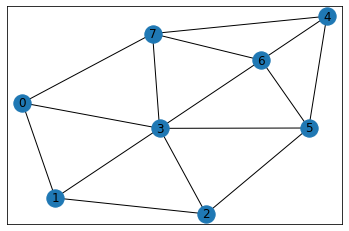

In [8]:
nx.draw_networkx(graph)

In [9]:
def explain_all_paths (graph, start, end, found, visited, paths):

  if (start not in visited) and (not found):
    visited.append(start)
    print('visited <----' , start)

    if (start == end):
      print('-------¡ META ',start,'!-------')
      paths.append(visited.copy()) #Save path
      print('De momento:', paths)
      print('Borrando ', visited.pop())
      return visited

    else:
      for adj in list(graph.adj[start]):
        print(start, ') probando con ', adj, '| visited: ', visited)
        if (end not in visited):
          visited = explain_all_paths(graph, adj, end, found, visited, paths)

    print('Borrando ', visited.pop()) #We have exhausted all adjacents

  return visited

paths = []
explain_all_paths(graph, 0, 7, False, [], paths)
paths

visited <---- 0
0 ) probando con  1 | visited:  [0]
visited <---- 1
1 ) probando con  0 | visited:  [0, 1]
1 ) probando con  2 | visited:  [0, 1]
visited <---- 2
2 ) probando con  1 | visited:  [0, 1, 2]
2 ) probando con  3 | visited:  [0, 1, 2]
visited <---- 3
3 ) probando con  0 | visited:  [0, 1, 2, 3]
3 ) probando con  1 | visited:  [0, 1, 2, 3]
3 ) probando con  2 | visited:  [0, 1, 2, 3]
3 ) probando con  5 | visited:  [0, 1, 2, 3]
visited <---- 5
5 ) probando con  3 | visited:  [0, 1, 2, 3, 5]
5 ) probando con  4 | visited:  [0, 1, 2, 3, 5]
visited <---- 4
4 ) probando con  7 | visited:  [0, 1, 2, 3, 5, 4]
visited <---- 7
-------¡ META  7 !-------
De momento: [[0, 1, 2, 3, 5, 4, 7]]
Borrando  7
4 ) probando con  5 | visited:  [0, 1, 2, 3, 5, 4]
4 ) probando con  6 | visited:  [0, 1, 2, 3, 5, 4]
visited <---- 6
6 ) probando con  3 | visited:  [0, 1, 2, 3, 5, 4, 6]
6 ) probando con  5 | visited:  [0, 1, 2, 3, 5, 4, 6]
6 ) probando con  7 | visited:  [0, 1, 2, 3, 5, 4, 6]
visited <

[[0, 1, 2, 3, 5, 4, 7],
 [0, 1, 2, 3, 5, 4, 6, 7],
 [0, 1, 2, 3, 5, 6, 7],
 [0, 1, 2, 3, 5, 6, 4, 7],
 [0, 1, 2, 3, 6, 5, 4, 7],
 [0, 1, 2, 3, 6, 7],
 [0, 1, 2, 3, 6, 4, 7],
 [0, 1, 2, 3, 7],
 [0, 1, 2, 5, 3, 6, 7],
 [0, 1, 2, 5, 3, 6, 4, 7],
 [0, 1, 2, 5, 3, 7],
 [0, 1, 2, 5, 4, 7],
 [0, 1, 2, 5, 4, 6, 3, 7],
 [0, 1, 2, 5, 4, 6, 7],
 [0, 1, 2, 5, 6, 3, 7],
 [0, 1, 2, 5, 6, 7],
 [0, 1, 2, 5, 6, 4, 7],
 [0, 1, 3, 2, 5, 4, 7],
 [0, 1, 3, 2, 5, 4, 6, 7],
 [0, 1, 3, 2, 5, 6, 7],
 [0, 1, 3, 2, 5, 6, 4, 7],
 [0, 1, 3, 5, 4, 7],
 [0, 1, 3, 5, 4, 6, 7],
 [0, 1, 3, 5, 6, 7],
 [0, 1, 3, 5, 6, 4, 7],
 [0, 1, 3, 6, 5, 4, 7],
 [0, 1, 3, 6, 7],
 [0, 1, 3, 6, 4, 7],
 [0, 1, 3, 7],
 [0, 3, 1, 2, 5, 4, 7],
 [0, 3, 1, 2, 5, 4, 6, 7],
 [0, 3, 1, 2, 5, 6, 7],
 [0, 3, 1, 2, 5, 6, 4, 7],
 [0, 3, 2, 5, 4, 7],
 [0, 3, 2, 5, 4, 6, 7],
 [0, 3, 2, 5, 6, 7],
 [0, 3, 2, 5, 6, 4, 7],
 [0, 3, 5, 4, 7],
 [0, 3, 5, 4, 6, 7],
 [0, 3, 5, 6, 7],
 [0, 3, 5, 6, 4, 7],
 [0, 3, 6, 5, 4, 7],
 [0, 3, 6, 7],
 [0, 3, 6, 4, 7],
 

In [10]:
def all_paths (graph, start, end, found, visited, paths):

  if (start not in visited) and (not found):
    visited.append(start)

    if (start == end):
      paths.append(visited.copy()) #Save path
      visited.pop()
      return visited

    else:
      for adj in list(graph.adj[start]):
        if (end not in visited):
          visited = all_paths(graph, adj, end, found, visited, paths)

    visited.pop() #We have exhausted all adjacents

  return visited

paths = []
all_paths(graph, 0, 7, False, [], paths)
paths

[[0, 1, 2, 3, 5, 4, 7],
 [0, 1, 2, 3, 5, 4, 6, 7],
 [0, 1, 2, 3, 5, 6, 7],
 [0, 1, 2, 3, 5, 6, 4, 7],
 [0, 1, 2, 3, 6, 5, 4, 7],
 [0, 1, 2, 3, 6, 7],
 [0, 1, 2, 3, 6, 4, 7],
 [0, 1, 2, 3, 7],
 [0, 1, 2, 5, 3, 6, 7],
 [0, 1, 2, 5, 3, 6, 4, 7],
 [0, 1, 2, 5, 3, 7],
 [0, 1, 2, 5, 4, 7],
 [0, 1, 2, 5, 4, 6, 3, 7],
 [0, 1, 2, 5, 4, 6, 7],
 [0, 1, 2, 5, 6, 3, 7],
 [0, 1, 2, 5, 6, 7],
 [0, 1, 2, 5, 6, 4, 7],
 [0, 1, 3, 2, 5, 4, 7],
 [0, 1, 3, 2, 5, 4, 6, 7],
 [0, 1, 3, 2, 5, 6, 7],
 [0, 1, 3, 2, 5, 6, 4, 7],
 [0, 1, 3, 5, 4, 7],
 [0, 1, 3, 5, 4, 6, 7],
 [0, 1, 3, 5, 6, 7],
 [0, 1, 3, 5, 6, 4, 7],
 [0, 1, 3, 6, 5, 4, 7],
 [0, 1, 3, 6, 7],
 [0, 1, 3, 6, 4, 7],
 [0, 1, 3, 7],
 [0, 3, 1, 2, 5, 4, 7],
 [0, 3, 1, 2, 5, 4, 6, 7],
 [0, 3, 1, 2, 5, 6, 7],
 [0, 3, 1, 2, 5, 6, 4, 7],
 [0, 3, 2, 5, 4, 7],
 [0, 3, 2, 5, 4, 6, 7],
 [0, 3, 2, 5, 6, 7],
 [0, 3, 2, 5, 6, 4, 7],
 [0, 3, 5, 4, 7],
 [0, 3, 5, 4, 6, 7],
 [0, 3, 5, 6, 7],
 [0, 3, 5, 6, 4, 7],
 [0, 3, 6, 5, 4, 7],
 [0, 3, 6, 7],
 [0, 3, 6, 4, 7],
 

In [11]:
def all_paths (graph, start, end, found, visited, paths):

  if (start not in visited) and (not found):
    visited.append(start)

    if (start == end):
      paths.append(visited.copy()) #Save path
      visited.pop()
      return visited

    else:
      for adj in list(graph.adj[start]):
        if (end not in visited):
          visited = all_paths(graph, adj, end, found, visited, paths)

    visited.pop() #We have exhausted all adjacents

  return visited

paths = []
all_paths(graph, 0, 7, False, [], paths)
paths

[[0, 1, 2, 3, 5, 4, 7],
 [0, 1, 2, 3, 5, 4, 6, 7],
 [0, 1, 2, 3, 5, 6, 7],
 [0, 1, 2, 3, 5, 6, 4, 7],
 [0, 1, 2, 3, 6, 5, 4, 7],
 [0, 1, 2, 3, 6, 7],
 [0, 1, 2, 3, 6, 4, 7],
 [0, 1, 2, 3, 7],
 [0, 1, 2, 5, 3, 6, 7],
 [0, 1, 2, 5, 3, 6, 4, 7],
 [0, 1, 2, 5, 3, 7],
 [0, 1, 2, 5, 4, 7],
 [0, 1, 2, 5, 4, 6, 3, 7],
 [0, 1, 2, 5, 4, 6, 7],
 [0, 1, 2, 5, 6, 3, 7],
 [0, 1, 2, 5, 6, 7],
 [0, 1, 2, 5, 6, 4, 7],
 [0, 1, 3, 2, 5, 4, 7],
 [0, 1, 3, 2, 5, 4, 6, 7],
 [0, 1, 3, 2, 5, 6, 7],
 [0, 1, 3, 2, 5, 6, 4, 7],
 [0, 1, 3, 5, 4, 7],
 [0, 1, 3, 5, 4, 6, 7],
 [0, 1, 3, 5, 6, 7],
 [0, 1, 3, 5, 6, 4, 7],
 [0, 1, 3, 6, 5, 4, 7],
 [0, 1, 3, 6, 7],
 [0, 1, 3, 6, 4, 7],
 [0, 1, 3, 7],
 [0, 3, 1, 2, 5, 4, 7],
 [0, 3, 1, 2, 5, 4, 6, 7],
 [0, 3, 1, 2, 5, 6, 7],
 [0, 3, 1, 2, 5, 6, 4, 7],
 [0, 3, 2, 5, 4, 7],
 [0, 3, 2, 5, 4, 6, 7],
 [0, 3, 2, 5, 6, 7],
 [0, 3, 2, 5, 6, 4, 7],
 [0, 3, 5, 4, 7],
 [0, 3, 5, 4, 6, 7],
 [0, 3, 5, 6, 7],
 [0, 3, 5, 6, 4, 7],
 [0, 3, 6, 5, 4, 7],
 [0, 3, 6, 7],
 [0, 3, 6, 4, 7],
 

#BFS

In [12]:
def BFS(graph, start, visited):

  queue = deque([])
  queue.append(start)

  while (len(queue) != 0):
    node = queue.popleft()

    if (node not in visited):
      visited.append(node)

    for adj in list(graph.adj[node]):
      if (adj not in queue and adj not in visited):
        queue.append(adj)
    # print(queue)


visited = []
BFS(graph,0,visited)
visited

[0, 1, 3, 7, 2, 5, 6, 4]

In [40]:
def num_shortest_paths(graph, start, distances, num_paths):

  visited = []
  
  distances[start] = 0 #max distance from the initial node to 'start' is always zero

  num_paths[start] = 1

  queue = deque() #queue for bfs
  queue.append(start)

  visited.append(start)

  while len(queue) != 0:
    node = queue.popleft()

    if (node not in visited):
      visited.append(node)

    for adj in graph.adj[node]:
      if (adj not in visited and adj not in queue):
        queue.append(adj)

      if (distances[adj] > distances[node] + 1):
        distances[adj] = distances[node] + 1
        num_paths[adj] = num_paths[node]

      elif (distances[adj] == distances[node] + 1):
        num_paths[adj] += num_paths[node]

#Test function      
graph_nodes = list(graph.nodes)
distances = dict ( [(node, sys.maxsize) for node in graph_nodes] )
num_paths = dict ( [(node, []) for node in graph_nodes] )


num_shortest_paths(graph, 4, distances, num_paths)
distances
num_paths
  

{0: 1, 1: 5, 2: 1, 3: 3, 4: 1, 5: 1, 6: 1, 7: 1}

In [41]:
def num_shortest_paths_all(graph):

  graph_nodes = list(graph.nodes)

  num_paths_list = []

  distances = dict ( [(node, sys.maxsize) for node in graph_nodes] )
  num_paths = dict ( [(node, []) for node in graph_nodes] )

  for node in graph_nodes:

    num_paths.clear()
    distances.clear()

    distances = dict ( [(node, sys.maxsize) for node in graph_nodes] )
    num_paths = dict ( [(node, []) for node in graph_nodes] )

    num_shortest_paths(graph, node, distances, num_paths)

    num_paths_list.append(num_paths.copy())

  return num_paths_list


#Test function
paths_list = num_shortest_paths_all(graph)
paths_list

[{0: 1, 1: 1, 2: 2, 3: 1, 4: 1, 5: 1, 6: 2, 7: 1},
 {0: 1, 1: 1, 2: 1, 3: 1, 4: 5, 5: 2, 6: 1, 7: 2},
 {0: 2, 1: 1, 2: 1, 3: 1, 4: 1, 5: 1, 6: 2, 7: 1},
 {0: 1, 1: 1, 2: 1, 3: 1, 4: 3, 5: 1, 6: 1, 7: 1},
 {0: 1, 1: 5, 2: 1, 3: 3, 4: 1, 5: 1, 6: 1, 7: 1},
 {0: 1, 1: 2, 2: 1, 3: 1, 4: 1, 5: 1, 6: 1, 7: 3},
 {0: 2, 1: 1, 2: 2, 3: 1, 4: 1, 5: 1, 6: 1, 7: 1},
 {0: 1, 1: 2, 2: 1, 3: 1, 4: 1, 5: 3, 6: 1, 7: 1}]

In [15]:
def shortest_paths(graph, start, distances, parents):
  """ Get all distances from the 'start' node and its path to all nodes in the graph 

      Returns:
          distances: dict(node, shortest_distance_to_start),
          parents: path from node to start. dict(node,predecessor)
  """

  visited= []

  distances[start] = 0
  parents[start] = None

  queue = deque()
  queue.append(start)

  visited.append(start)

  while (len(queue) != 0):
    visiting = queue.popleft()
    if (visiting not in visited):
      visited.append(visiting)

    for adj in graph.adj[visiting]:
      if (adj not in visited) and (adj not in queue):
        queue.append(adj)

      if (distances[adj] > distances[visiting] + 1):
        distances[adj] = distances[visiting] + 1
        parents[adj].clear()
        parents[adj].append(visiting)

      elif (distances[adj] == distances[visiting] + 1):
        parents[adj].append(visiting)  



### Test code
distances = dict ( [(node, sys.maxsize) for node in graph_nodes] )
parents =  dict ( [(node, []) for node in graph_nodes] )

shortest_paths(graph, 4, distances, parents)
distances

{0: 2, 1: 3, 2: 2, 3: 2, 4: 0, 5: 1, 6: 1, 7: 1}

In [16]:
def shortest_paths(graph, start):
  """ Get all distances from the 'start' node and its path to all nodes in the graph 

      Returns:
          distances: dict(node, shortest_distance_from_start),
          parents: path from node to start as dict(node,predecessor),
          num_shortest_paths: dict(node, num_shortest_paths_from_start)
  """
  #visited list to avoid loops
  visited= []

  #distances from each node to the 'start' node
  distances = dict ( [(node, sys.maxsize) for node in graph_nodes] ) 

  #predecessors from each node to the 'start' node 
  parents =  dict ( [(node, []) for node in graph_nodes] )

  #number of shortest paths
  num_shortest_paths = dict ( [(node, []) for node in graph_nodes] )

  #initialize before loop
  distances[start] = 0
  parents[start] = None
  num_shortest_paths[start] = 1

  #queue data structure for BFS
  queue = deque()
  queue.append(start)

  #mark 'start' as visited
  visited.append(start)

  while (len(queue) != 0):
    visiting = queue.popleft() #visit the first element of the queue (remove it)
    if (visiting not in visited):
      visited.append(visiting) #mark as visited

    for adj in graph.adj[visiting]: #iterate through adjacent nodes
      if (adj not in visited) and (adj not in queue):
        queue.append(adj) #add not visited nodes to queue

      #if 'adj' node has been visited before and has a longer path that using '
      #visiting' as predecessor --> update it (this is the shortest path)

      #if 'adj' node has not been visited before, it will always enter this 'if'
      #because distances are initialized as sys.maxsize
      if (distances[adj] > distances[visiting] + 1): 
        distances[adj] = distances[visiting] + 1
        parents[adj].clear()
        parents[adj].append(visiting)
        num_shortest_paths[adj] = num_shortest_paths[visiting]


      #if 'adj' node has the same distance than 'visiting' + 1, it means we have
      #encountered another shortest path --> add 'visiting' as parent in 
      #the shortest path
      elif (distances[adj] == distances[visiting] + 1):
        parents[adj].append(visiting)
        num_shortest_paths[adj] += num_shortest_paths[visiting]

  #End of algorithm, return results
  return (distances, parents, num_shortest_paths)

### Test code
distances, parents, num_shortest_paths = shortest_paths(graph, 4)
num_shortest_paths


{0: 1, 1: 5, 2: 1, 3: 3, 4: 1, 5: 1, 6: 1, 7: 1}

In [17]:
def get_betweenness(graph, start, distances, parents, num_shortest_paths):
  """ Calculate betweenness of all nodes given source node 
      Returns: list of betweenness scores
  """
  
  betweenness = [0] * graph.number_of_nodes() 

  #furthest nodes from the selected node
  furthest_nodes = sorted(distances, key=distances.get, reverse=True)

  #traverse from the furthest selected node using path in parents
  for node in furthest_nodes:
    if (node != start):
      for parent in parents[node]:
        betweenness[parent] += ( (1 + betweenness[node]) / len(parents[node]) )
        
  return betweenness

In [18]:
def betweenness_score (graph):
  """Compute betweenness score of every node in graph using Newman's method

    Returns: dict (key=node,  value=betweenness_score)

    Ref: M. E. J. Newman  10.1103/PhysRevE.64.016132 
        Link: https://journals.aps.org/pre/pdf/10.1103/PhysRevE.64.016132
  """

  graph_nodes = list(graph.nodes())

  sum_betweenness = [0] * graph.number_of_nodes()

  distances = dict ( [(node, sys.maxsize) for node in graph_nodes] ) 
  parents =  dict ( [(node, []) for node in graph_nodes] ) 
  num_shortest_paths = dict ( [(node, []) for node in graph_nodes] )

  for node in graph_nodes:

    #clear all dicts after iteration
    distances.clear()
    parents.clear()
    num_shortest_paths.clear()

    #call function shortest_paths
    distances, parents, num_shortest_paths = shortest_paths(graph, node) 

    #use distances, parents to update scores
    betweenness_from_node = get_betweenness(graph, node, distances, parents, num_shortest_paths)
    
    sum_betweenness = np.add(sum_betweenness, betweenness_from_node)

  
  betweenness = dict( [(graph_nodes[index], score) for index,score in enumerate(sum_betweenness)])
  return betweenness

##Test 
betweenness = betweenness_score(graph)
print(betweenness)

{0: 8.5, 1: 8.0, 2: 8.5, 3: 19.666666666666664, 4: 7.666666666666666, 5: 11.444444444444443, 6: 8.777777777777779, 7: 11.444444444444443}


In [19]:
def normalize(betweenness, n):
  betweenness_array = np.array(betweenness)

  norm = betweenness_array / ((n-1)*(n-2)/2)
  return norm

bt_norm = normalize(list(betweenness.values()), graph.number_of_nodes())
bt_norm

array([0.4047619 , 0.38095238, 0.4047619 , 0.93650794, 0.36507937,
       0.54497354, 0.41798942, 0.54497354])

In [20]:
#Compute betweenness using Ulrik-Brandes method
betweenness_answer = nx.betweenness_centrality(graph, normalized=False, endpoints=True)
betweenness_answer

{0: 7.699999999999999,
 1: 7.5,
 2: 7.699999999999999,
 3: 13.433333333333334,
 4: 7.333333333333334,
 5: 9.233333333333334,
 6: 7.866666666666666,
 7: 9.233333333333334}

In [21]:
betweenness = betweenness_score(graph)

In [22]:
#Girvan-Newman
def Girvan_Newman_nodes(graph, k):

  graph_copy = graph.copy()

  betweenness = betweenness_score(graph)
  betweenness_values = list(betweenness.values())

  betweenness_nodes_sorted = sorted(betweenness, key=betweenness.get, reverse=True)
  betweenness_values_sorted = sorted(betweenness_values, reverse=True)

  queue = deque()
  [queue.append(score) for score in betweenness_values_sorted]

  nodes_to_remove = []

  for num_levels in range(k):

    element = queue.popleft()
    element_node = betweenness_nodes_sorted.pop(0)

    next = queue.popleft()
    next_node = betweenness_nodes_sorted.pop(0)
    
    while (element == next):
      next = queue.popleft()
      next_node = betweenness_nodes_sorted.pop(0)
    
    #element != next, restore 'next' in queue
    queue.appendleft(next)
    betweenness_nodes_sorted.insert(0, next_node)


  return betweenness_nodes_sorted

Girvan_Newman(graph, 5)

[4]

In [23]:
def get_edge_betweenness(graph, start):
  """
  Get edge betweenness of all edges given source node 'start' 
  """

  edges_btwnss = dict([(edge, 0) for edge in graph.edges()])
  node_betweenness = dict([(node, 0) for node in graph.nodes()])
  
  distances, parents, num_shortest_paths = shortest_paths(graph, start) 

  #furthest nodes from the selected node
  furthest_nodes = sorted(distances, key=distances.get, reverse=True)

  for node in furthest_nodes:
    if node != start:
      for parent in parents[node]:
        node_betweenness[parent] += (1 + node_betweenness[parent]) / len(parents[node])
        if (node, parent) in edges_btwnss:
          edges_btwnss[node,parent] = (1 + node_betweenness[node]) / num_shortest_paths[node]
        elif (parent,node) in edges_btwnss:
          edges_btwnss[parent,node] = (1 + node_betweenness[node]) / num_shortest_paths[node]

  return edges_btwnss

In [24]:
def edge_betweenness(graph):

  btwnss = [0] * len(graph.edges())

  for node in graph.nodes():
    btwnnss_node = get_edge_betweenness(graph, node)
    btwnss = np.add(btwnss, list(btwnnss_node.values())) #here we are using a dict_view instead of original values
    
  #since dict_view has 15 significant ciphers, we will be using 14
  btwnss = [round(score, 14) for score in btwnss]
  btwnss_dict = dict(zip(graph.edges(), btwnss))
  
  return btwnss_dict

edge_betweenness(graph)

{(0, 1): 4.2,
 (0, 3): 7.5,
 (0, 7): 7.0,
 (1, 2): 4.2,
 (1, 3): 7.7,
 (2, 3): 7.5,
 (2, 5): 7.0,
 (3, 5): 7.77777777777778,
 (3, 6): 8.61111111111111,
 (3, 7): 7.77777777777778,
 (4, 5): 5.86666666666666,
 (4, 6): 2.86666666666667,
 (4, 7): 5.86666666666666,
 (5, 6): 3.66666666666667,
 (6, 7): 3.66666666666667}

In [25]:
nx.edge_betweenness(graph,normalized=False)

{(0, 1): 2.2,
 (0, 3): 3.0,
 (0, 7): 3.2,
 (1, 2): 2.2,
 (1, 3): 3.5999999999999996,
 (2, 3): 3.0,
 (2, 5): 3.2,
 (3, 5): 3.3666666666666663,
 (3, 6): 3.533333333333333,
 (3, 7): 3.3666666666666663,
 (4, 5): 3.0666666666666664,
 (4, 6): 1.5333333333333332,
 (4, 7): 3.0666666666666664,
 (5, 6): 1.8333333333333333,
 (6, 7): 1.833333333333333}

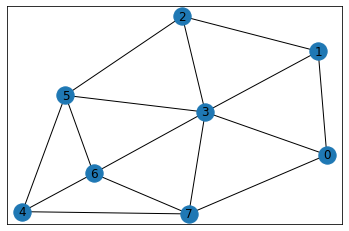

In [42]:
#Girvan-Newman
def Girvan_Newman(graph, k):
  """Compute betweenness score of every node in graph using Newman's method
  applied to edges instead of nodes.

  Returns: dict (key=node,  value=betweenness_score)

  Ref: M. E. J. Newman  10.1103/PhysRevE.64.016132 
      Link: https://journals.aps.org/pre/pdf/10.1103/PhysRevE.64.016132
  """

  graph_copy = graph.copy()

  betweenness = edge_betweenness(graph)
  betweenness_values = list(betweenness.values())

  edges_sorted = sorted(betweenness, key=betweenness.get, reverse=True)
  betweenness_values_sorted = sorted(betweenness_values, reverse=True)

  queue = deque()
  [queue.append(score) for score in betweenness_values_sorted]


  for num_levels in range(k):
    if len(queue) > 2 :
      element = queue.popleft()
      element_edge = edges_sorted.pop(0)

      next = queue.popleft()
      next_edge = edges_sorted.pop(0)
      
      while (element == next):
        next = queue.popleft()
        next_edge = edges_sorted.pop(0)
      
      #element != next, restore 'next' in queue
      queue.appendleft(next)
      edges_sorted.insert(0, next_edge)

    elif len(queue) == 1:
      element = queue.popleft()
      element_edge = edges_sorted.pop(0)
      
  g = nx.Graph()
  g.add_edges_from(edges_sorted)
  g.add_nodes_from(graph.nodes())
  return g

g = Girvan_Newman(graph, 0)
nx.draw_networkx(g)